# Thresholding
A method to create a binary image from a grayscale image, more generally tag pixels with one of a finite set of labels.

> Algorithm to classify pixels into different categories. Segment objects from the background. eg. Black or White, Background or Foreground.

**Histogram-based(global):** 
* Assume properties for the histogram of pixel intensifies
* Create histogram for all pixel intensities, then look for peaks - fast & efficient but ignores relationships between neighbours.

**Local:**
* consider neighbouring pixels while processing one pixel
* computationally intense (slow)
* captures relationships between pixels

In [1]:
import matplotlib.pyplot as plt

from skimage import data, io, color
from skimage.filters import threshold_otsu, threshold_local

### Load an image in grayscale

https://www.pexels.com/photo/cathedral-interior-view-705778/

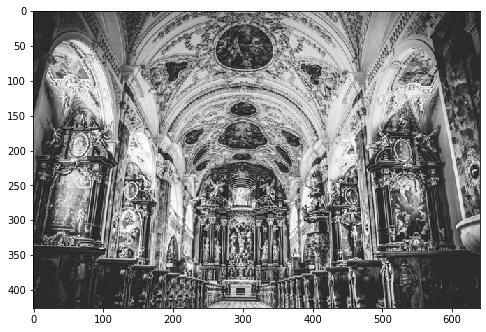

In [2]:
cathedral = color.rgb2gray(io.imread('./images/pexels-painting.jpg'))

plt.figure(figsize=(8,8))
plt.imshow(cathedral, cmap='gray')

In [3]:
cathedral = cathedral * 255

#### Different thresholding algorithms

* Otsu's algorithm tries to find an optimal threshold based on the image
* If the image has a large variation in background intensity then adaptive thresholding algorithms are better

In [4]:
thresh = threshold_otsu(cathedral)
print('Threshold value of this image:', thresh)

Threshold value of this image: 130.1079326171875


Create a binary image from the found thresh value

In [5]:
cathedral_binary = cathedral > thresh

In [6]:
print('binary values of the image \n', cathedral_binary)

binary values of the image 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


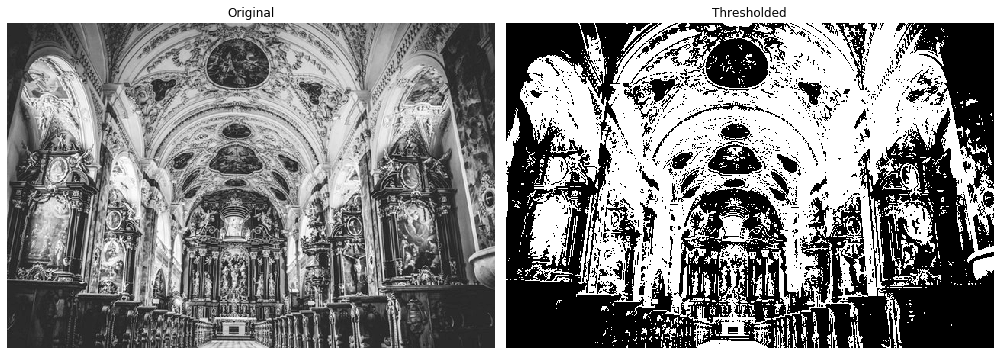

In [7]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(14, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(cathedral, cmap='gray')  
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cathedral_binary, cmap='gray')
ax[1].set_title('Thresholded') 
ax[1].axis('off')

fig.tight_layout()
plt.show()

### Note that the image has a lot of variation in intensity

Otsu's threshold is not a great option for this image

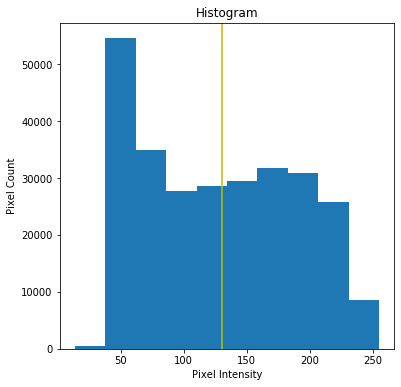

In [8]:
# Don't execute this for threshold_local

fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(cathedral.ravel())

ax.set_title('Histogram')
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Pixel Count')

ax.axvline(thresh, color='y')

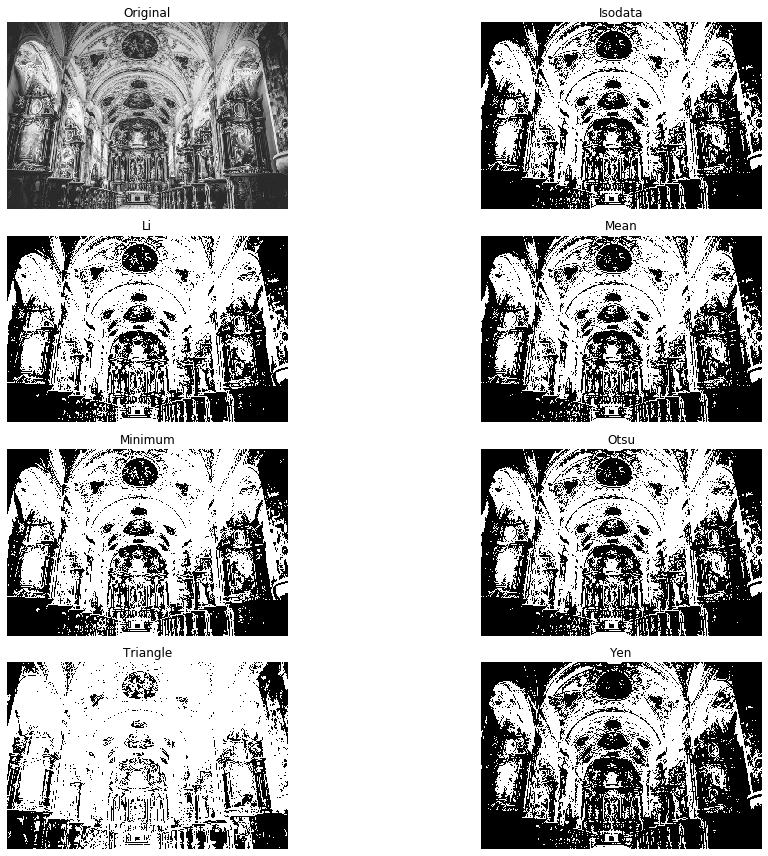

In [9]:
from skimage.filters import try_all_threshold


fig, ax = try_all_threshold(cathedral, figsize=(16, 12), verbose=False)
plt.show()

In [11]:
thresh = threshold_local(cathedral, block_size = 25)

print('Threshold value of this image:', thresh)
cathedral_binary = cathedral > thresh

Threshold value of this image: [[53.77010381 53.77013214 53.77018106 ... 55.83969579 55.29986809
  55.03323479]
 [53.77006964 53.77009745 53.77014544 ... 55.85550109 55.31185535
  55.04328931]
 [53.76999748 53.77002462 53.77007146 ... 55.88594475 55.33492722
  55.06262048]
 ...
 [53.77283783 53.77319664 53.77388933 ... 53.77008884 53.77012453
  53.77010903]
 [53.7717683  53.77199439 53.77242946 ... 53.7700761  53.77011858
  53.77010918]
 [53.7712768  53.77144103 53.77175628 ... 53.77006937 53.77011532
  53.77010931]]


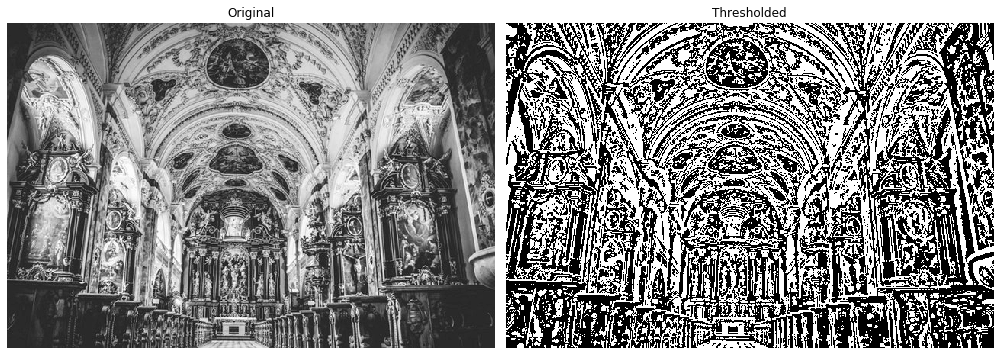

In [12]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(14, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(cathedral, cmap='gray')  
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cathedral_binary, cmap='gray')
ax[1].set_title('Thresholded') 
ax[1].axis('off')

fig.tight_layout()
plt.show()